## Summary

The task of this experiment is to implement SoftMax regression for classification on handwritten digits. The data is from the MNIST data set.  

After filling in softmax, cross entropy loss function and gradient calculation to the provided framework, we tune parameters: batch size, max epoch, learning rate and momentum, one by one, and choose the optimal solution among our tests based on the convergence, performances and time cost.  

The optimal model we choose has the parameters as following: learning rate 0.53, momentum 0.9, batch size 5000 and max epochs 128. The accuracy on the test set reaches to 0.9253 and has average loss at 0.2663.  

For extended experiments, we tested step decay and exponential decay on the learning rate, and tried to observe the differences between different gradient descent methods. Decaying can lead to faster convergence and smoother loss and accuracy, especially for exponential decay. SGD only becomes better until the batch size becomes huge. Since parameter tuning does not involve in this compare and contrast stage, we still could not come to a conclusion on which one is better for our data and task.  

Adam(Adaptive Movement Estimation algorithm) is implemented. The best model among the ones we test is: batch size 5000, decay for mean 0.9, decay for variance 0.99, step size 0.01, and the model will stop learning if updates on biases and weights are lower than a small threshold for 600 continuous steps. The mean accuracy and mean loss for this model on the test set prediction are 0.9264 and 0.2643. Overall, Adam can give reliable and statistical significance good learning results, with smooth loss and fast convergence, stable accuracy and less learning cost.  


In [1]:
from solver import Solver
from visualize import plot_loss_and_acc

import matplotlib.pyplot as plt
import numpy as np

## 1. Parameter Tuning

### 1.1 Batch Size

ref: https://blog.csdn.net/weixin_45928096/article/details/123643006

The smaller the batch size is, the more random the gradient can be. Large batch sizes usually suggest more stable gradients.  
When using a small batch size, due to the outliers or differences between samples, the weights and biases for the model can have large changes with gradients that are highly random. This increases the time lapse and also makes the model hard to converge. Although large batch sizes commit to more stable commits they can also decrease the generalization ability of the model.

Generally, default values for epoch is 32, 0.1 for learning rate and 0.9 for momentum. We will use this value for testing batch size. 
Batch size for testing are: 100, 200, 500, 1000, 5000.

In [ ]:
batch_sizes = [100, 200, 500, 1000, 5000]
train_elapse = []

for batch_size in batch_sizes:
    print("Batch Size: {}".format(batch_size))
    cfg = {
    'data_root': 'data',
    'max_epoch': 32,
    'batch_size': batch_size,
    'learning_rate': 0.1,
    'momentum': 0.9,
    'display_freq': 10,
    }
    runner = Solver(cfg)
    epoch_train_loss, epoch_train_acc, epoch_val_loss, epoch_val_acc, train_time = runner.train()
    train_elapse.append(train_time)
    
    plt.figure()
    x = [i for i in range(32)]
    # draw epoch accuracy and loss
    plt.xticks(x)
    plt.plot(x, epoch_train_loss, linestyle='-', label='train')
    plt.plot(x, epoch_val_loss, linestyle='-', label='val')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel("Loss")
    plt.title("Loss with batch size ={}".format(batch_size))
    
    plt.figure()
    plt.plot(x, epoch_train_acc, linestyle='-', label='train')
    plt.plot(x, epoch_val_acc, linestyle='--', label='val')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel("ACC")
    plt.title("ACC with batch size ={}".format(batch_size))

# draw time slapse with different batch size
plt.figure()
plt.xticks(batch_sizes)
plt.plot(batch_sizes, train_elapse, linestyle='-')
#plt.gca().axes.get_xaxis().set_visible(False)
plt.legend()
plt.xlabel('Batch Size')
plt.ylabel("Time")
plt.title("Train Time Elapse by Batch Size")

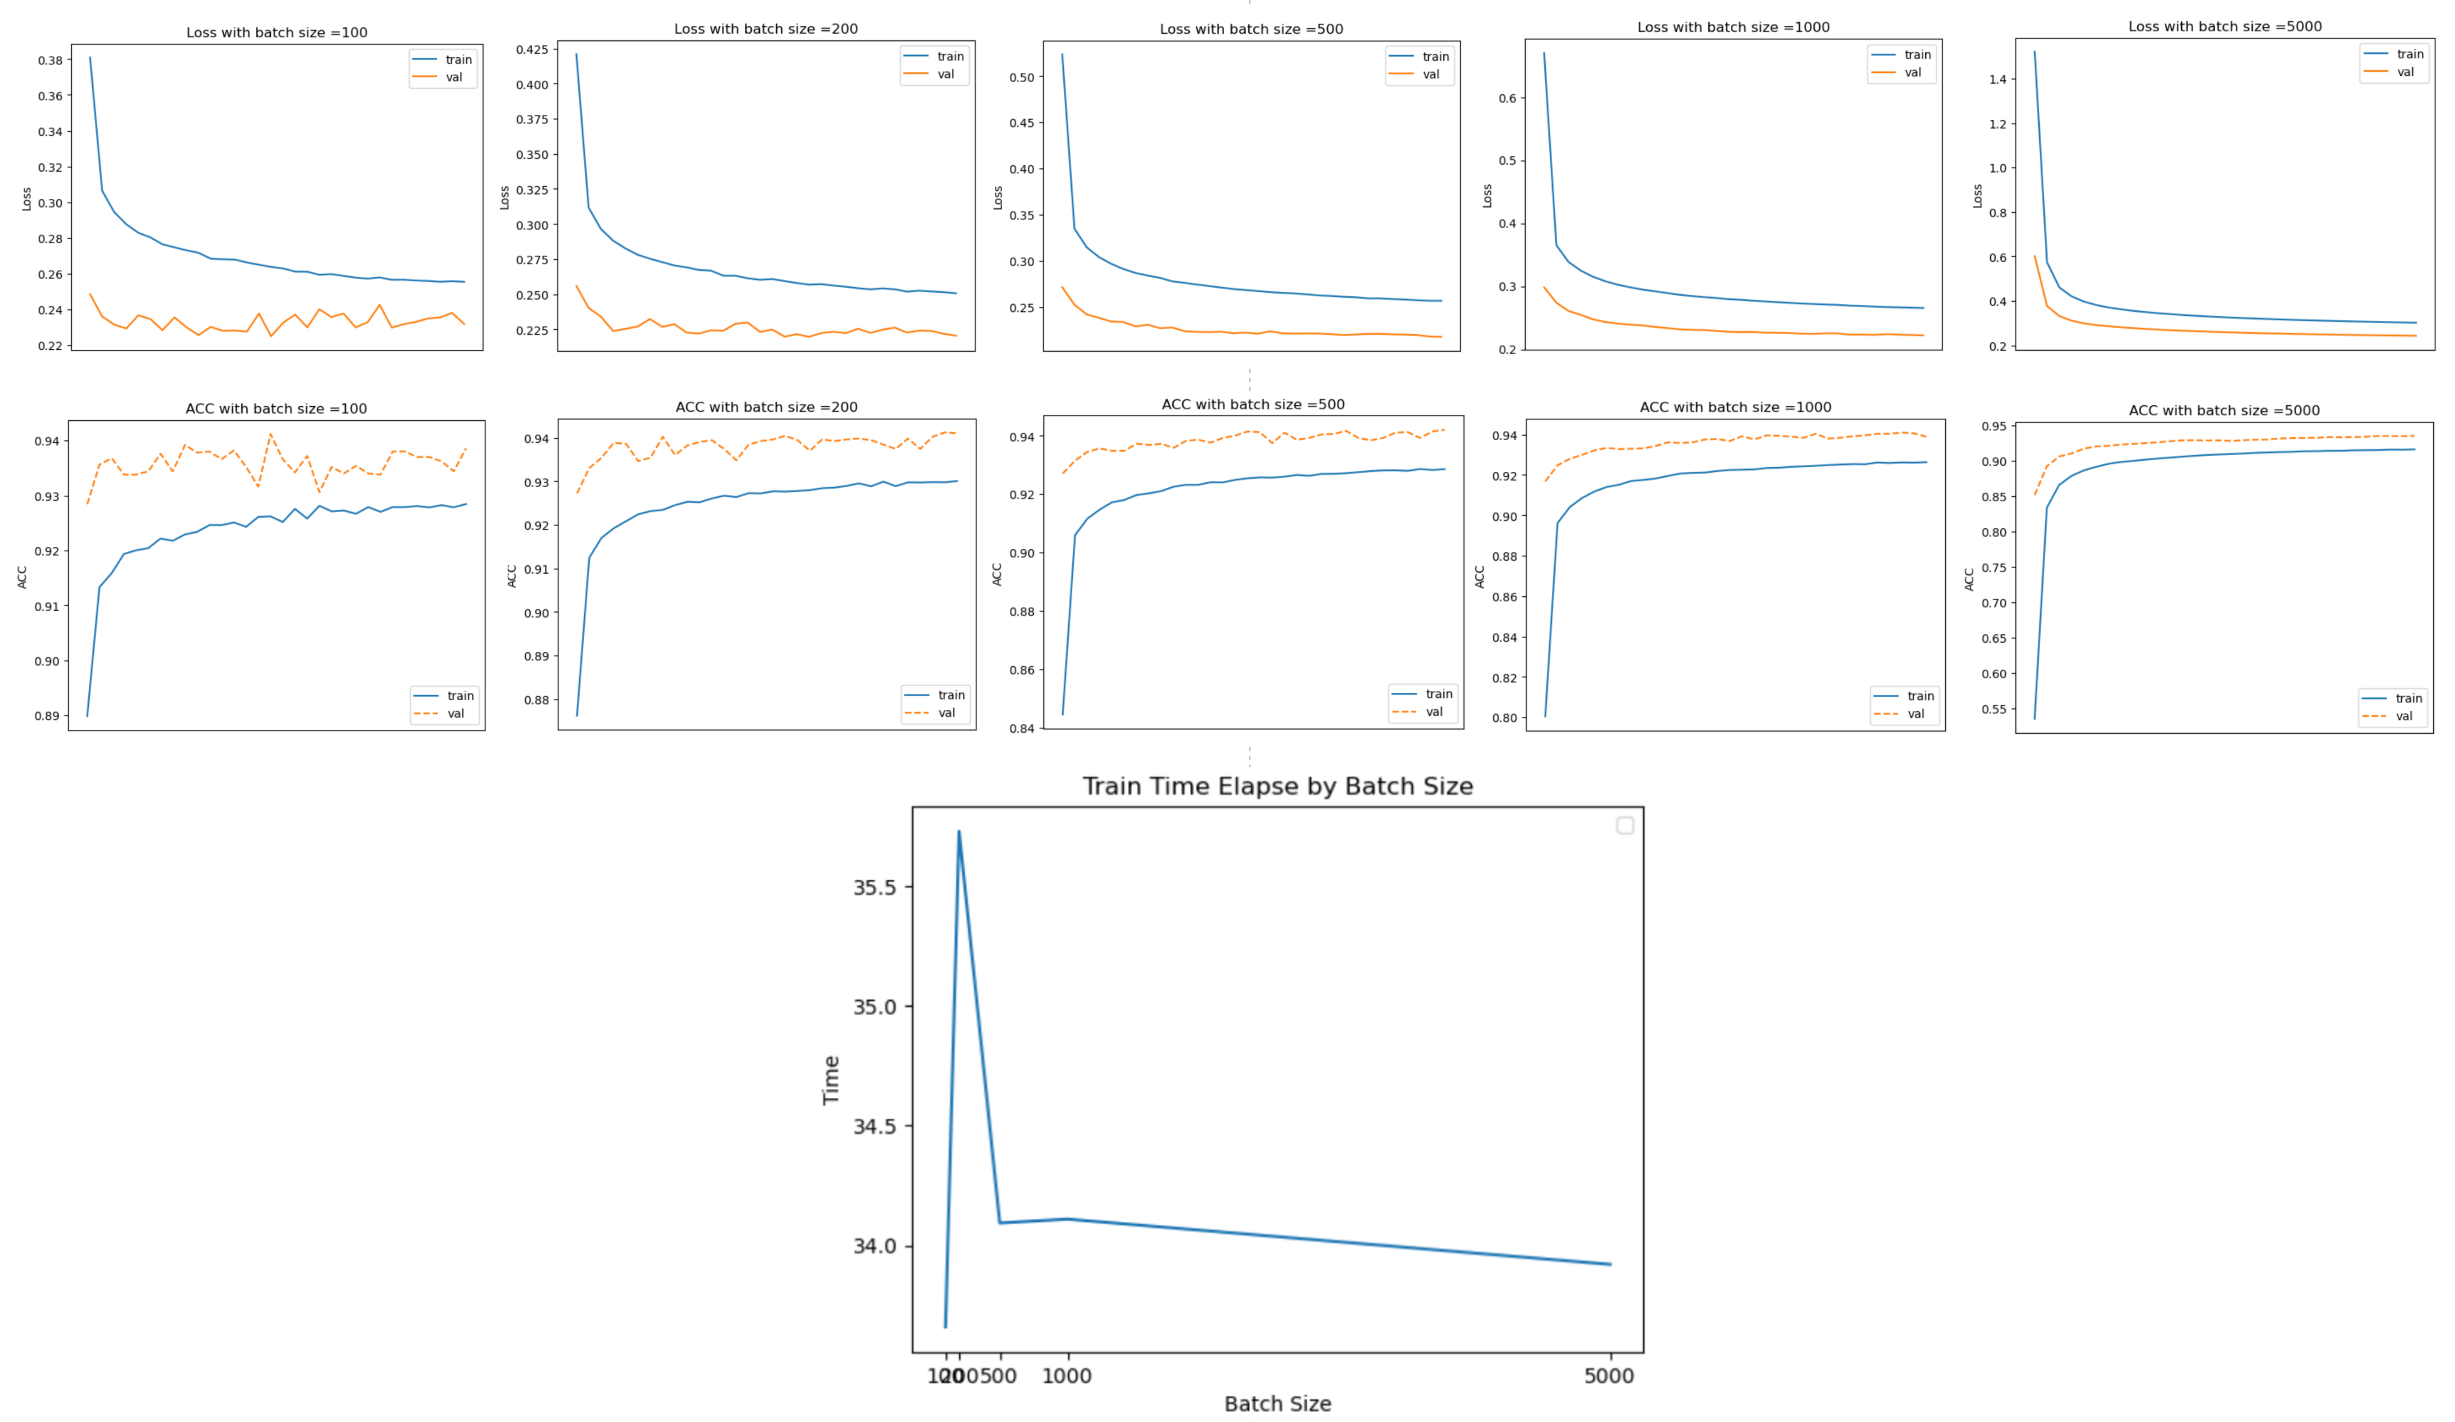

ref: https://stackoverflow.com/questions/63743557/fluctuating-loss-during-training-for-text-binary-classification

1. The time cost for different batch sizes are similar, all around 34-36 seconds. Training time increases massively when batch size increase from 100 to 200, then rapidly drop when batch size gets to 500, after which the curve follows a gentle downward trend. 

2. The accuracy scores keeps increasing and still have a upward trend at the last epoch. Therefore, we could use larger epoch values for later testing if they can provide better learning results.

3. When the batch size is smaller than 500, fluctuation happens on both loss and acuracy, especially on the validation set. And larger batch sizes have smoother loss curves and accuracy curves. Smaller batch sizes give noisy gradients but they converge faster because per epoch you have more updates. If your batch size is 1 you will have N updates per epoch. If it is N, you will only have 1 update per epoch. On the other hand, larger batch sizes give a more informative gradient but they convergence slower and increase computational conplexity. Our train dataset has 5.5K smaples, with a comparatively small batch size, it could lead to underfitting easily.

4. We will use batch size 100, 500 and 5000 for tuning epoch values. These three are: the worst, start to converge better and the best performances among our tests.

### 1.2 Epoch

ref: https://www.simplilearn.com/tutorials/machine-learning-tutorial/what-is-epoch-in-machine-learning 

An epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model.  
In one iteration alone you can not guarantee that the gradient descent algorithm would converge to a local minima with the specified learning rate. That is the reason to involke epoch for the gradient descent to converge better.  

Small batch and large batch each has advantages and disadvantages. We need to joint control the model with epoch. One example is epoch usually increses when the batch size grows.   

Epoch tested are: 8, 16, 32, 64, 128, 256, 512.  
PS. code is similar to section 1.1.

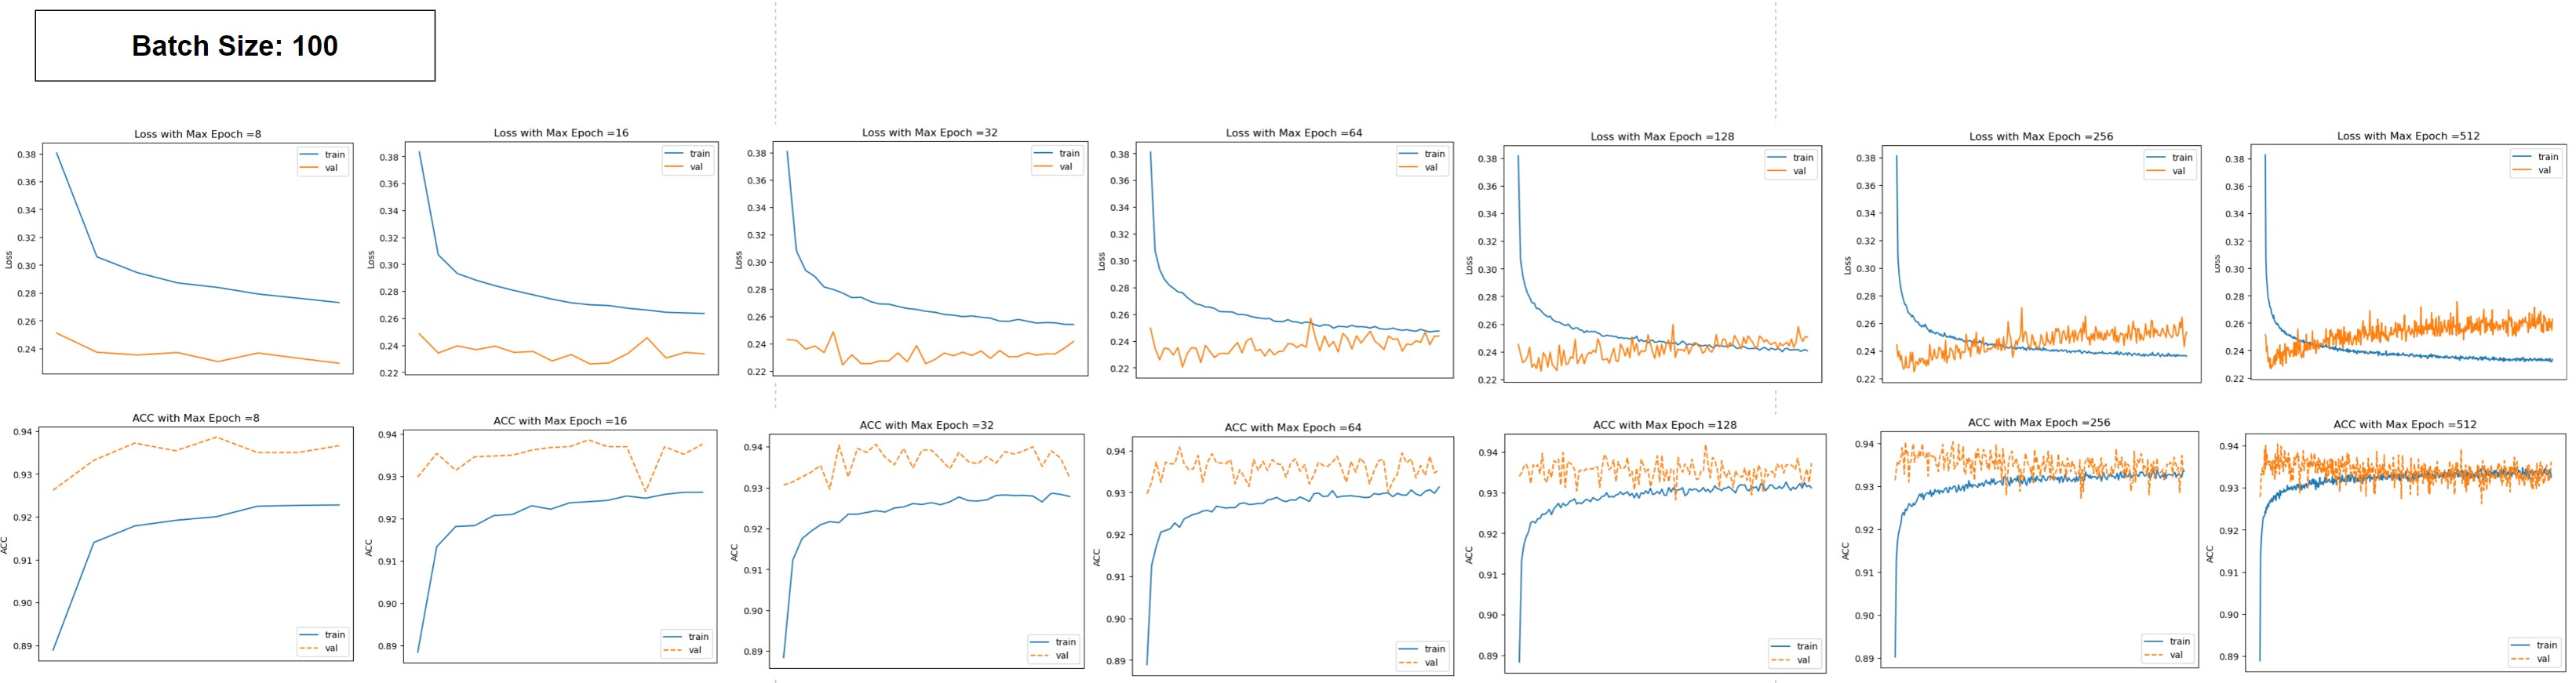  
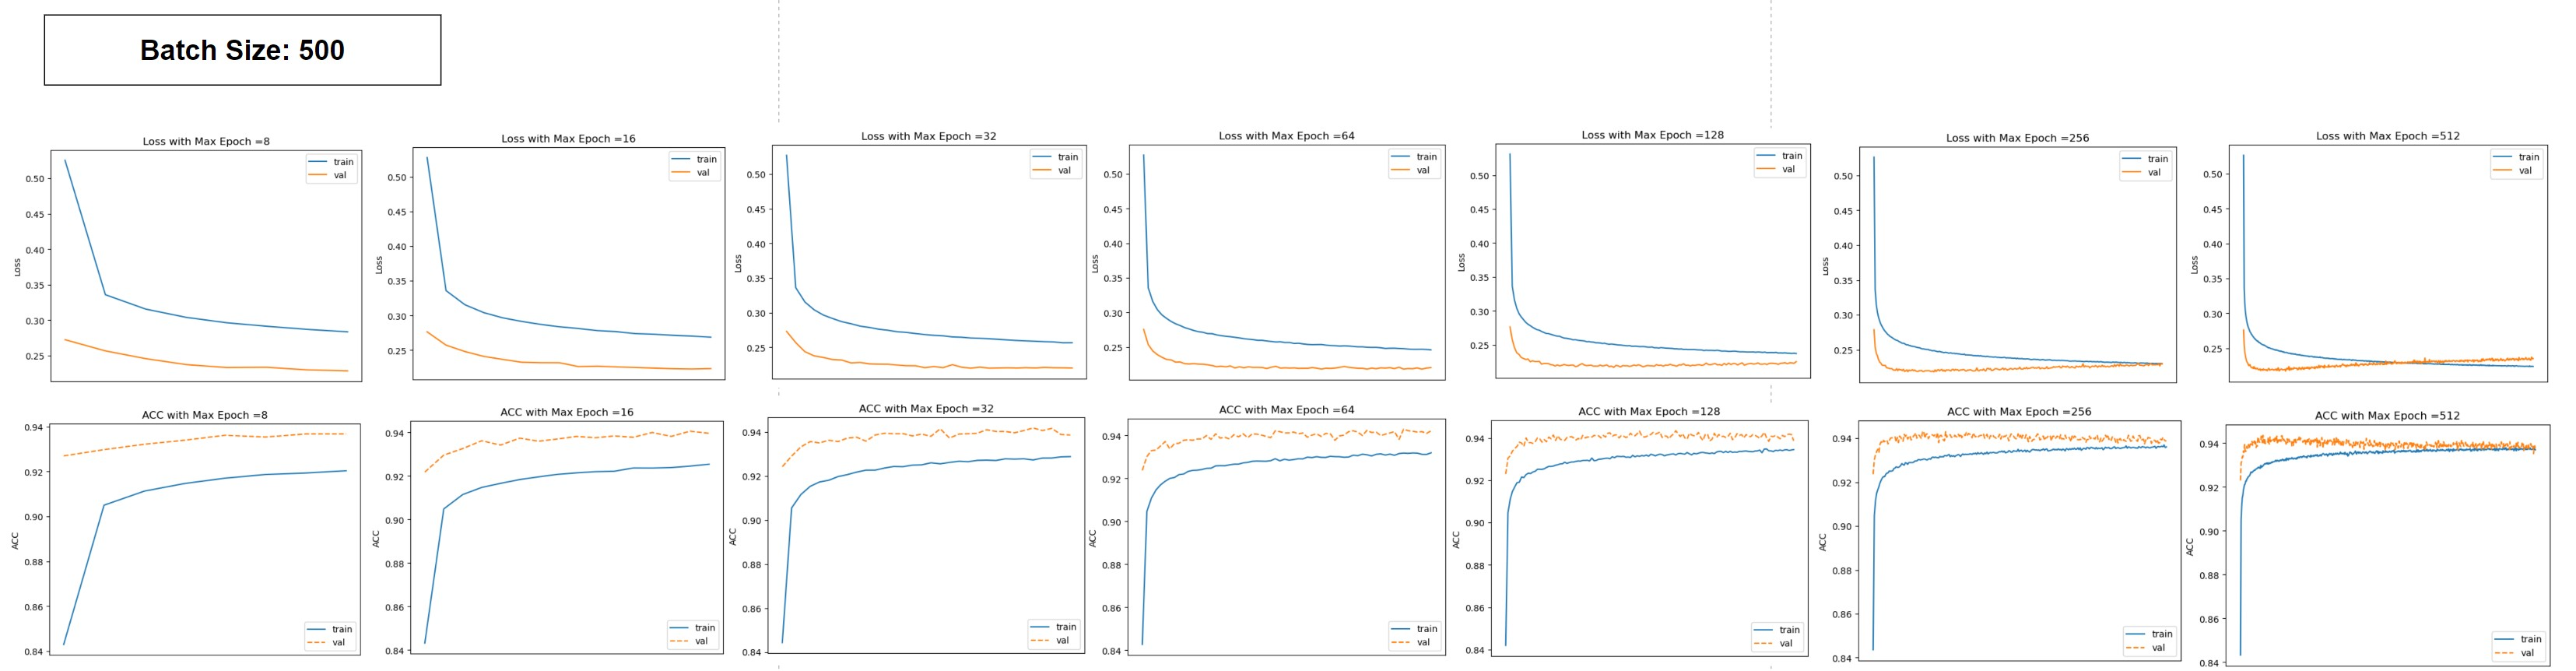
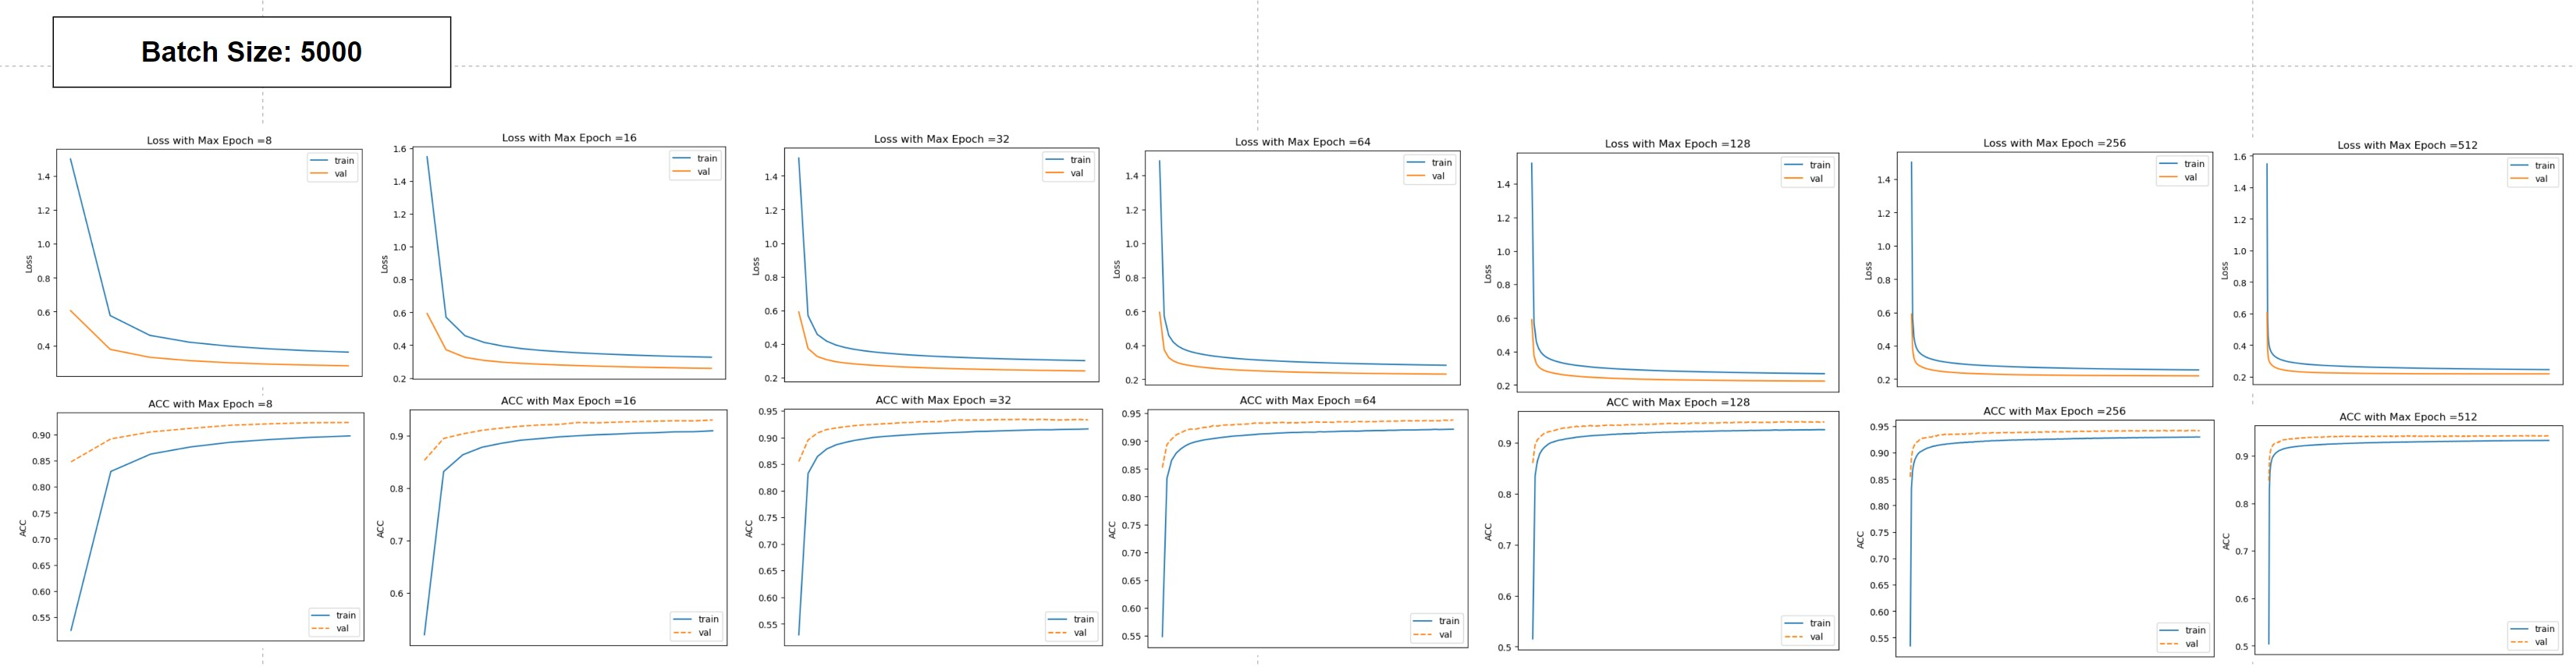
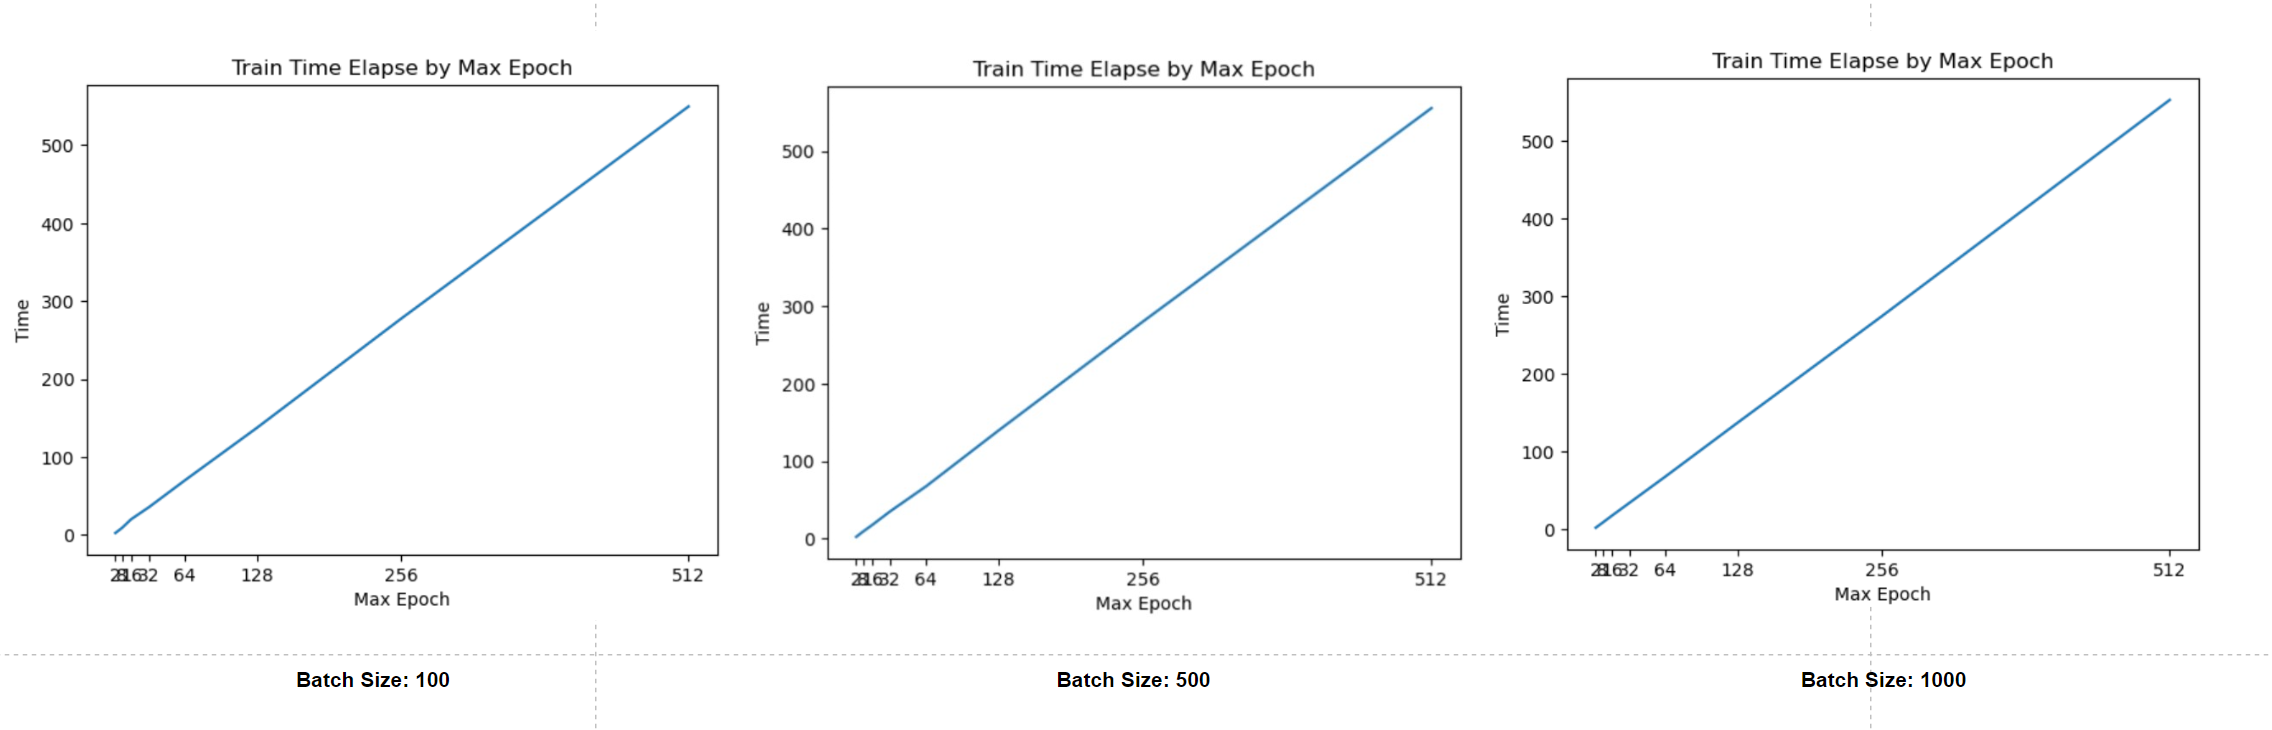

ref: https://blog.csdn.net/qq_36230981/article/details/129216625 

1. The balance between batch sizes and epochs has sufficient impact on how model converges. Small batch size with large epochs can cause frequent local oscilliations. This can be seen from the diagram when the batch size is set to 100. Under this parameter setting, we can see that both the validation loss and accuracy fluctuation gets greater. The loss on the train set still shows a downward trend  at the last epoch. This implies the model is still learning, usually due to underfitting. 

2. With batch size set to 100, when the epoch gets above 16, the loss curves on the train set follows a downward trend whilst follows an upward trend on the validation set. The occasion happens when the structure design of the network or the hyperparameter are completely unreasonable. 

3. The phenomenon in 2 also happens when the batch size is set tyo 500, but with less fluctuations. It is fair to make a conclusion that a model with a small batch size should not have a large epoch. The model can be too sensitive on noises and outliers.

4. Larger batch sizes imply smoother loss curves and more stable performance. Larger batch sizes also converge much faster than small batch sizes.

5. When the batch size is 5000 and the epoch is 128, the loss on the train set and the validation set gets to the lowest points. When the epoch gets greater than 128, the loss bounces back at a minor rate. Our model converges to a local optimal solution with this parameter combination.

6. For all batch sizes, the train time linearly increases with the epoch values in positive directions.

We will use batch size: 5000 and epoch 128 for tuning momentum and learning rate, since it has the best covergence and accuracy. The loss on the validation and train sets both decrease towards stability.

### 1.3 Learning Rate

ref: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/#:~:text=A%20learning%20rate%20that%20is,carefully%20selecting%20the%20learning%20rate.  

The amount that the weights are updated during training is referred to as the step size or the learning rate. Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0.  

The learning rate controls how quickly the model is adapted to the problem.  
A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck. The challenge of training deep learning neural networks involves carefully selecting the learning rate.

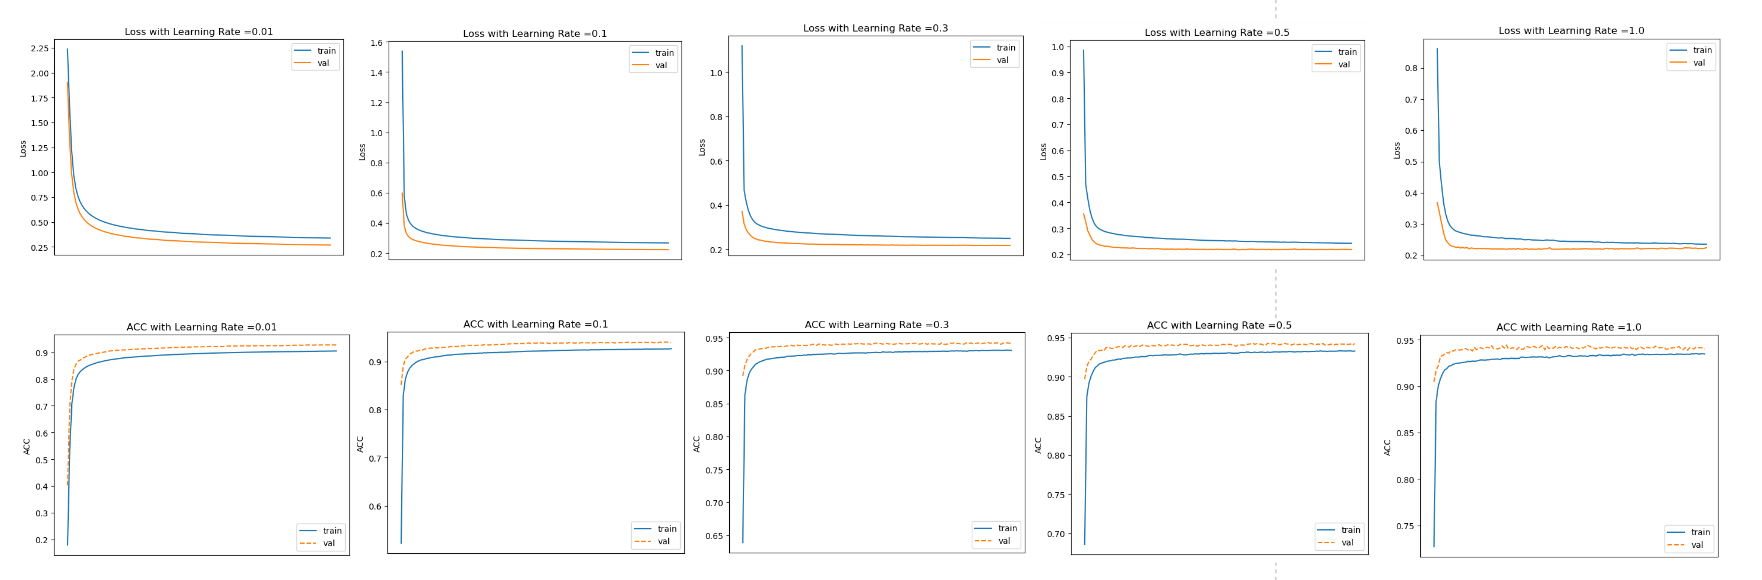
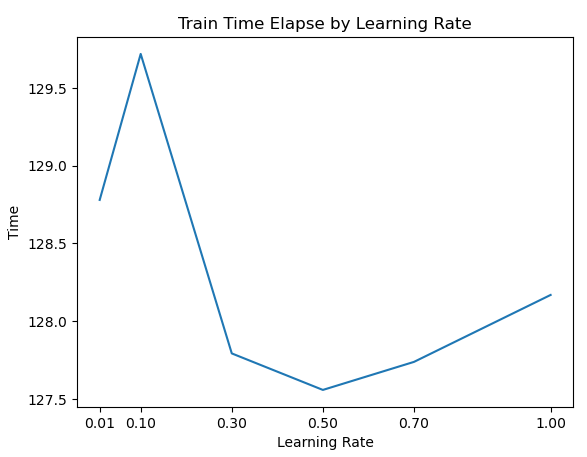

ref: https://towardsdatascience.com/https-medium-com-dashingaditya-rakhecha-understanding-learning-rate-dd5da26bb6de  

1. Most of the batch average loss reaches to 0.2 and accuracy scores reach to 0.94-0.95.

2. Both low and high learning rates results in wasted time and resources. A lower learning rate means more training time to converge, a learning rate too high can cause the model oscillate back and forth the optimal solution.

3. The model converge speed gets significantly improved when the learning rate switches from 0.01 to 0.1. Learning rate set to 0.01 also has the lowest losss among the tests we run. However, time cost for traing this model is the heaviest.

4. Our experiments do not show too much oscillation. 

5. A desirable learning rate is one that’s low enough so that the network converges to something useful but high enough so that it can be trained in a reasonable amount of time. Learning rates at 0.5 follows this rule. Therefore, we will try find the optimal learning rate around this 0.5 value. An assumption is made that learning rate at 0.5 should provide the optimal solution. The learning rates tested are: 0.4, 0.43, 0.45, 0.5, 0.53, 0.56, 0.6.

In [ ]:
lr_values = [0.4, 0.43, 0.45, 0.5, 0.53, 0.56, 0.6]
train_elapse = []
train_loss, train_acc, val_loss, val_acc = [], [], [], []

for lr in lr_values:
    print("Learning Rate: {}".format(lr))
    cfg = {
    'data_root': 'data',
    'max_epoch': 128,
    'batch_size': 5000,
    'learning_rate': lr,
    'momentum': 0.9,
    'display_freq': 10,
    }
    runner = Solver(cfg)
    epoch_train_loss, epoch_train_acc, epoch_val_loss, epoch_val_acc, train_time = runner.train()
    train_elapse.append(train_time)
    
    train_loss.append(epoch_train_loss)
    train_acc.append(epoch_train_acc)
    val_loss.append(epoch_val_loss)
    val_acc.append(epoch_val_acc)
    
    plt.figure()
    x = [i for i in range(128)]
    # draw epoch accuracy and loss
    plt.xticks(x)
    plt.plot(x, epoch_train_loss, linestyle='-', label='train')
    plt.plot(x, epoch_val_loss, linestyle='-', label='val')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend()
    plt.xlabel('Learning Rate')
    plt.ylabel("Loss")
    plt.title("Loss with Learning Rate ={}".format(lr))
    
    plt.figure()
    plt.plot(x, epoch_train_acc, linestyle='-', label='train')
    plt.plot(x, epoch_val_acc, linestyle='--', label='val')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.legend()
    plt.xlabel('Learning Rate')
    plt.ylabel("ACC")
    plt.title("ACC with Learning Rate ={}".format(lr))

# draw time slapse with different batch size
plt.figure()
plt.xticks(lr_values)
plt.plot(lr_values, train_elapse, linestyle='-')
#plt.gca().axes.get_xaxis().set_visible(False)
#plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel("Time")
plt.title("Train Time Elapse by Learning Rate")

In [ ]:
plt.figure()
plt.figure(figsize=(15,10))
plt.xticks(np.arange(1,128,step=5))
plt.ylim(0.22, 0.375)
for i in range(len(lr_values)):
    plt.plot(x, train_loss[i], linestyle='-', label='learn rate: {}'.format(lr_values[i]))
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel("Loss")
plt.title("Train Loss")

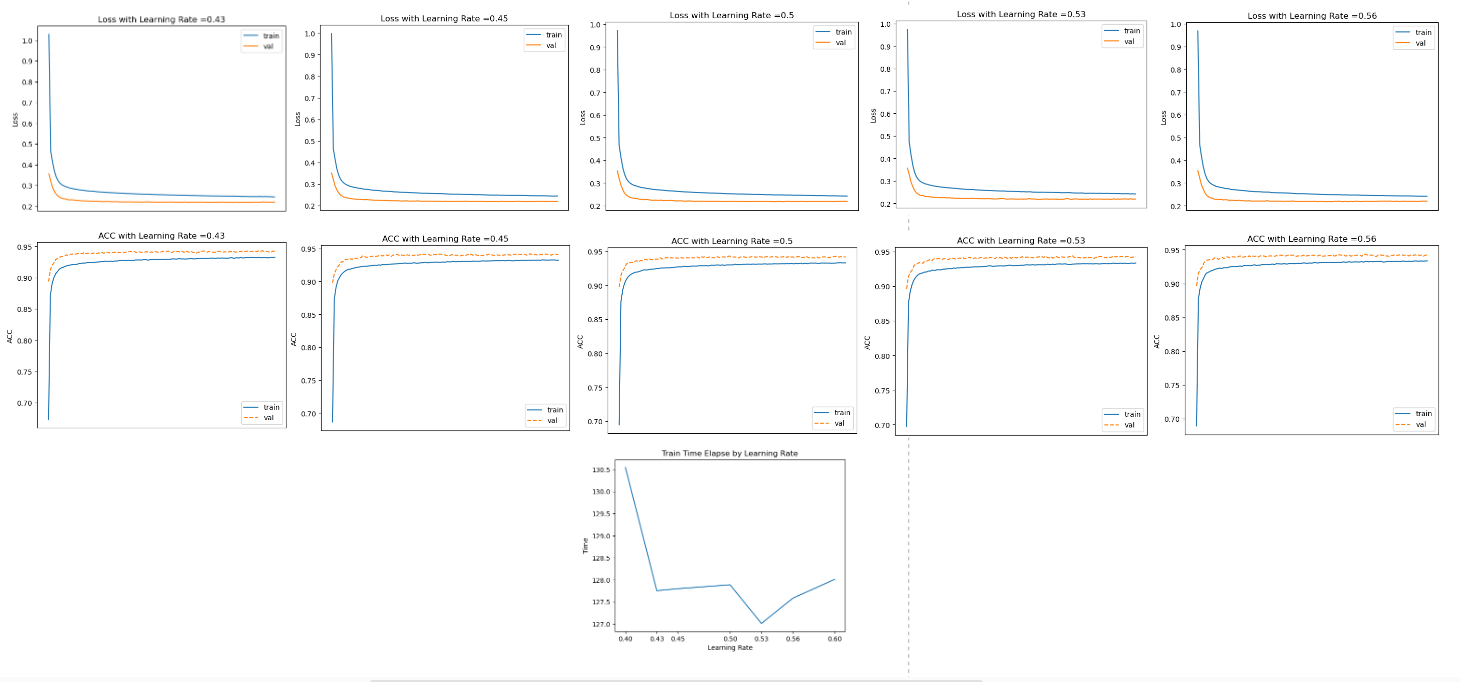


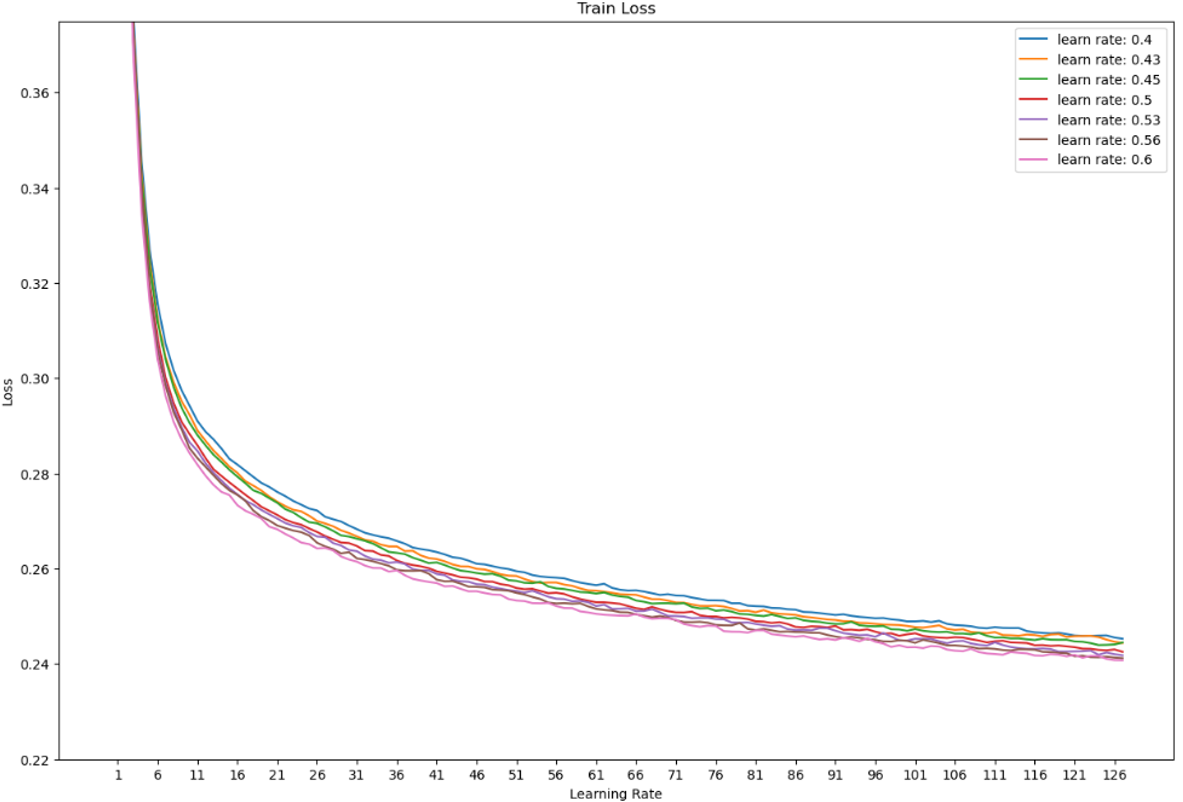

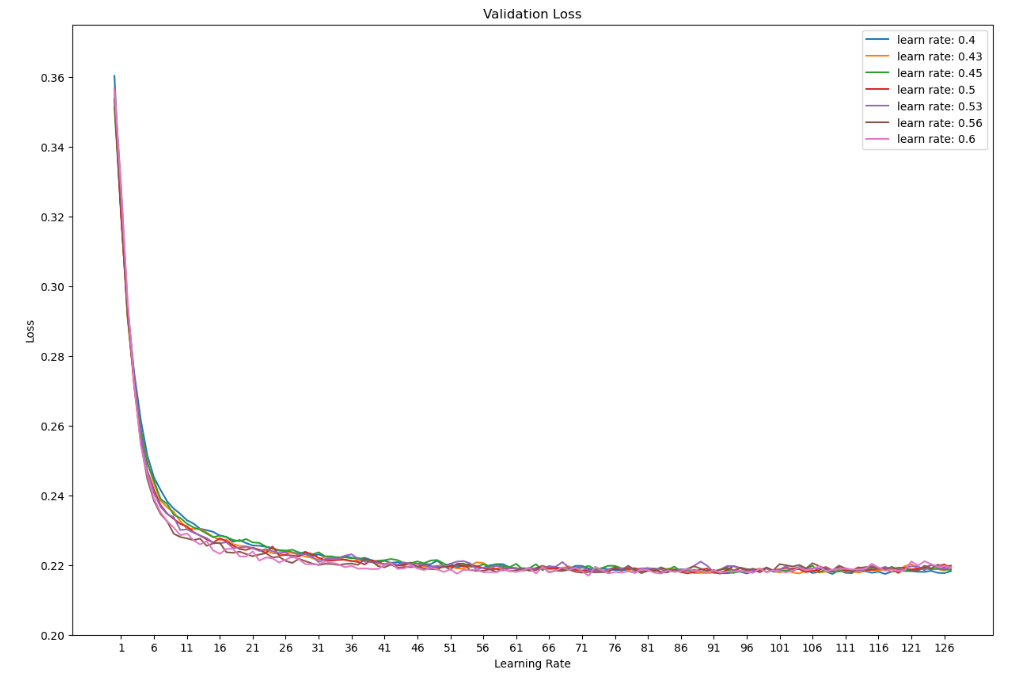

1. The lowest train time is around 127 seconds with the learn rate set to 0.53. The second lowest is also around 127 seconds with the learn rate at 0.43. 
2. The lowest loss from above diagrams is when the learn rate at 0.43.
3. On the train set, the convergence happens ealier when the learn rate is greater.
4. Loss on the validation set drops down significantly, then follows a gentle downward trend and finally stablizes at around 0.22. 
5. So far, the optimal solution should be among learn rate 0.43 and 0.53. Below is the diagram for their performance with average scores and variances. We could see from the diagram, learn rate 0.53 has better accuracy and loss on both the  validation set and the train set. Varainces between epochs for learn rate 0.53 are also lower on accuracy and loss. This could potentially suggests more stability and better performance from statistical point of view. Therefore, we will use this learn rate for studying the impact of the momentum.
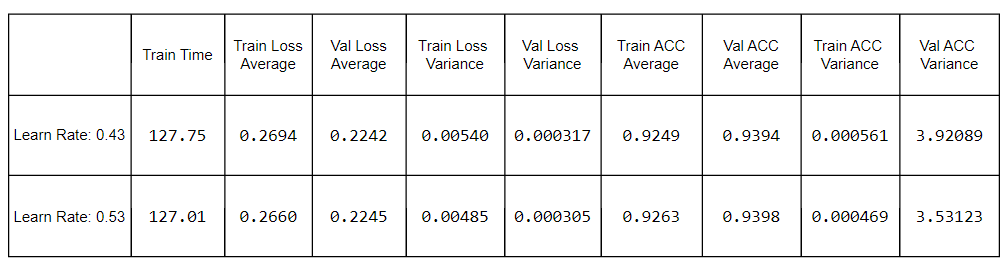


### 1.4 Momentum

ref: https://medium.com/ai%C2%B3-theory-practice-business/optimization-in-deep-learning-5a5d263172e#:~:text=Momentum%20or%20SGD%20with%20momentum,determine%20the%20direction%20to%20go.  
ref: https://www.tutorialspoint.com/what-is-momentum-in-machine-learning

Momentum or SGD with momentum is a method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. Momentum accumulates the gradient of the past steps to determine the direction to go. Since experiments before all initialize models with a momentum set to 0.9, an assumption is made that when we test smaller momentum, the convergence will be slower.  

In basic terms, momentum is a method of smoothing out model parameter updates and allowing the optimizer to continue advancing in the same direction as previously, minimizing oscillations and increasing convergence speed.

In practice, the coefficient of momentum is initialized at 0.5, and gradually annealed to 0.9 over multiple epochs. Over experiment will however, use the same momentum across all epochs.  
Momentum tested are: 0.0, 0.01, 0.1, 0.5, 0.9.

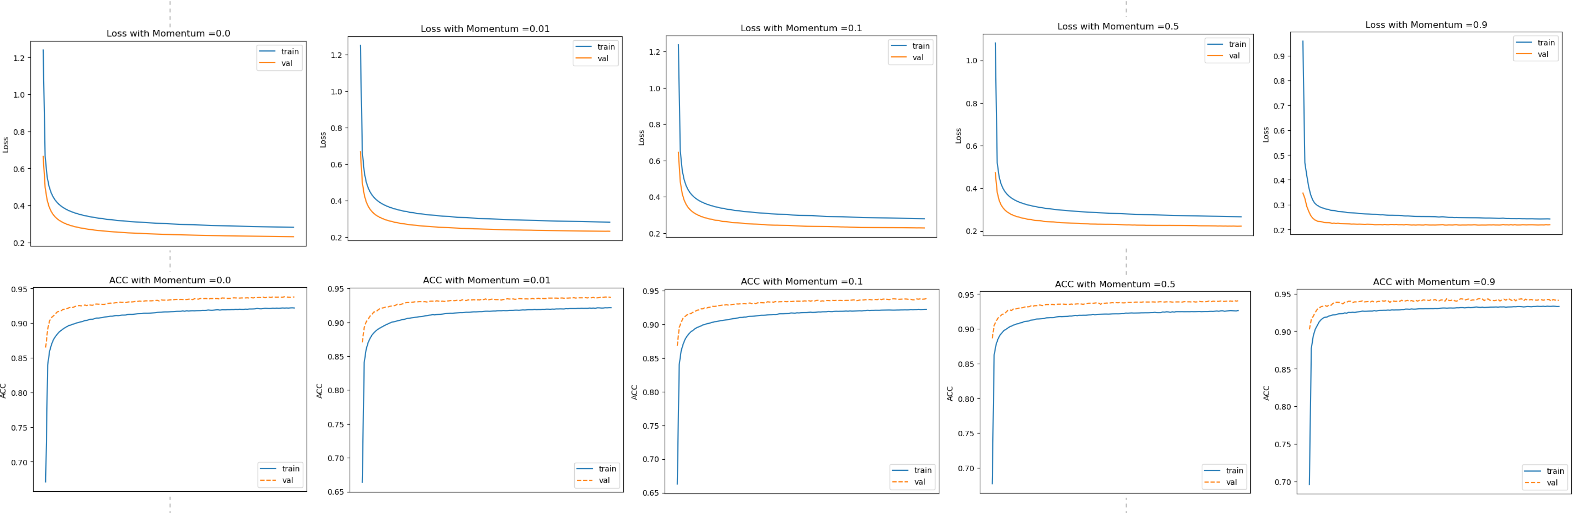
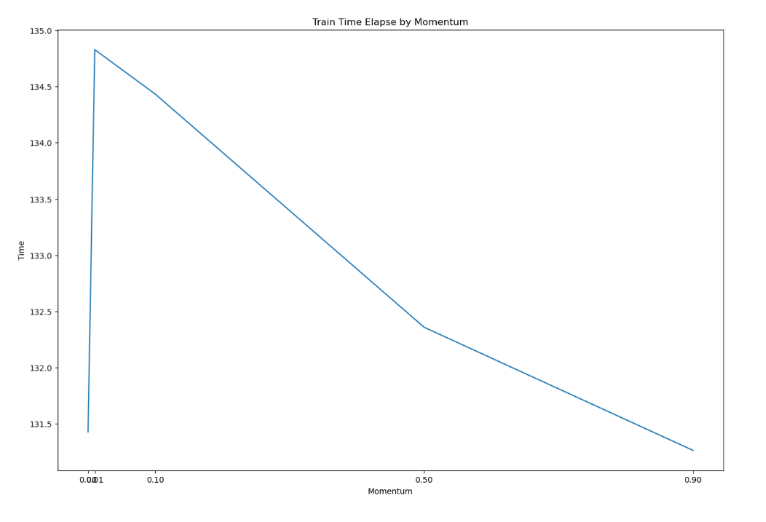
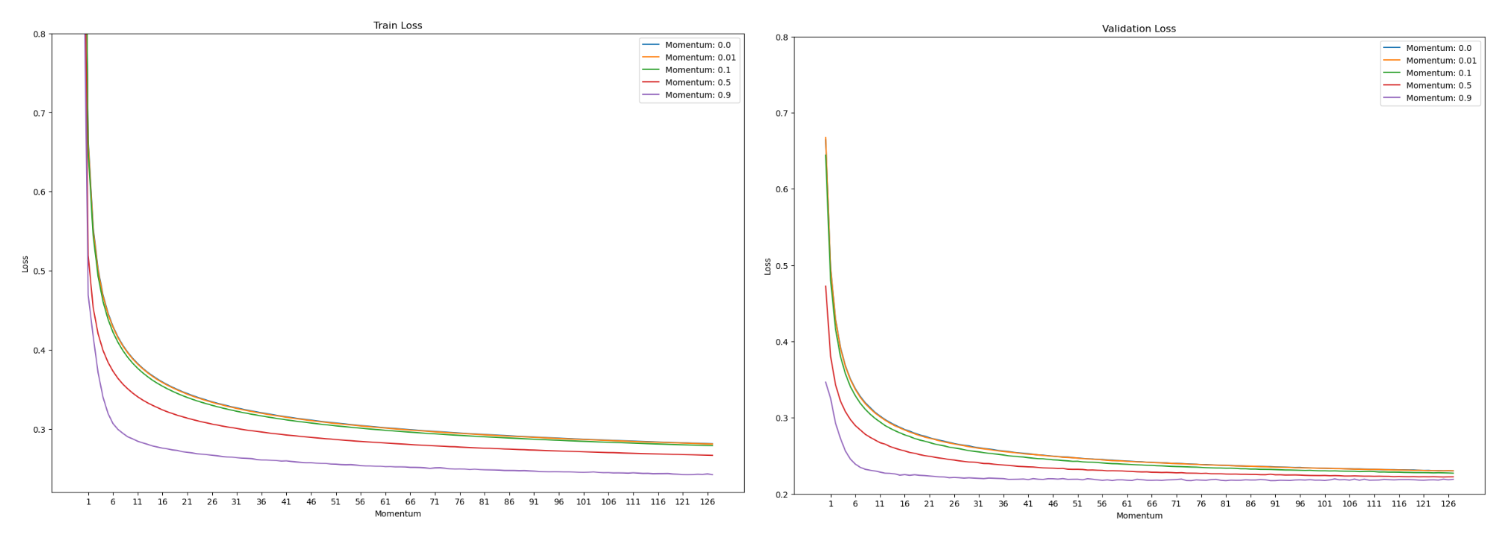
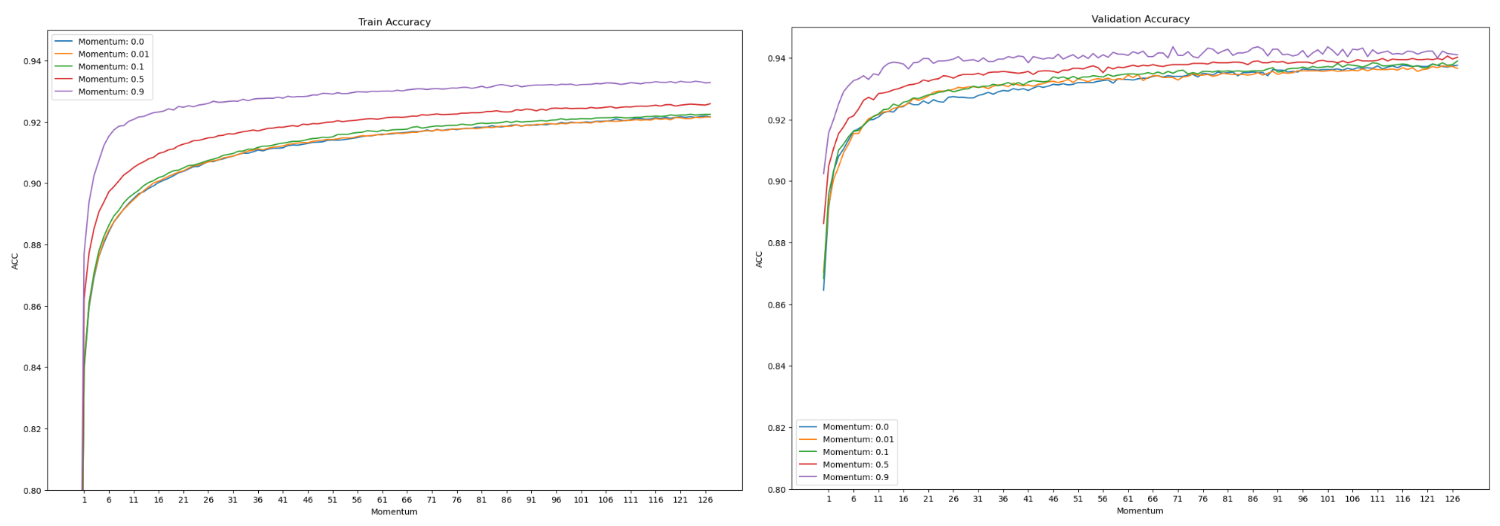  

1. Train time increases massively when the momentum increases from 0.0(disable) to 0.01. 
2. As expected, the smaller the momentum is, the faster the convergence happens, the smaller the loss gets and the better the accuracy the model prediction will be.

## 2. Test Set Result

We will use the model we selected from Section 1 to make the final prediction, that is: learning rate 0.53, momentum 0.9, batch size 5000 and max epochs 128.

In [25]:
cfg = {
    'data_root': 'data',
    'max_epoch': 128,
    'batch_size': 5000,
    'learning_rate': 0.53,
    'momentum': 0.9,
    'display_freq': 10,
    'decay_type': 'momentum',
    'drop_rate': 0.5,
    'drop_frequence': 10,
    'k': 0.1,
    }


runner = Solver(cfg)
epoch_train_loss, epoch_train_acc, epoch_val_loss, epoch_val_acc, train_time, learn_rates = runner.train()
test_loss, test_acc = runner.test()

print("Test set accuracy: {}".format(test_acc))
print("Test set loss: {}".format(test_loss))

Test set accuracy: 0.925
Test set loss: 0.2680731454807143


## 2. Extend: Learning Rate Schedules and Adaptive Learning Rate

ref: https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1  

Learning rate schedules seek to adjust the learning rate during training by reducing the learning rate according to a pre-defined schedule. Common learning rate schedules include time-based decay, step decay and exponential decay.  

In the previous section, we use the constant learning rate with momentum(can be seen as another form of adaptive). In this section, we will try step decay and exponential decay. Both two methods work with the epoch. 

We use 0.53 as the initial learn rate for testing.

### 2.1 Step Decay on Learning Rate

We will use the most common parameter settings for the step decay model. That is to drop the learning rate by half every 10 epochs.

### 2.2 Exponential Decay on Learning Rate

We will use the decay base k=0.1 since it is a regular practice.


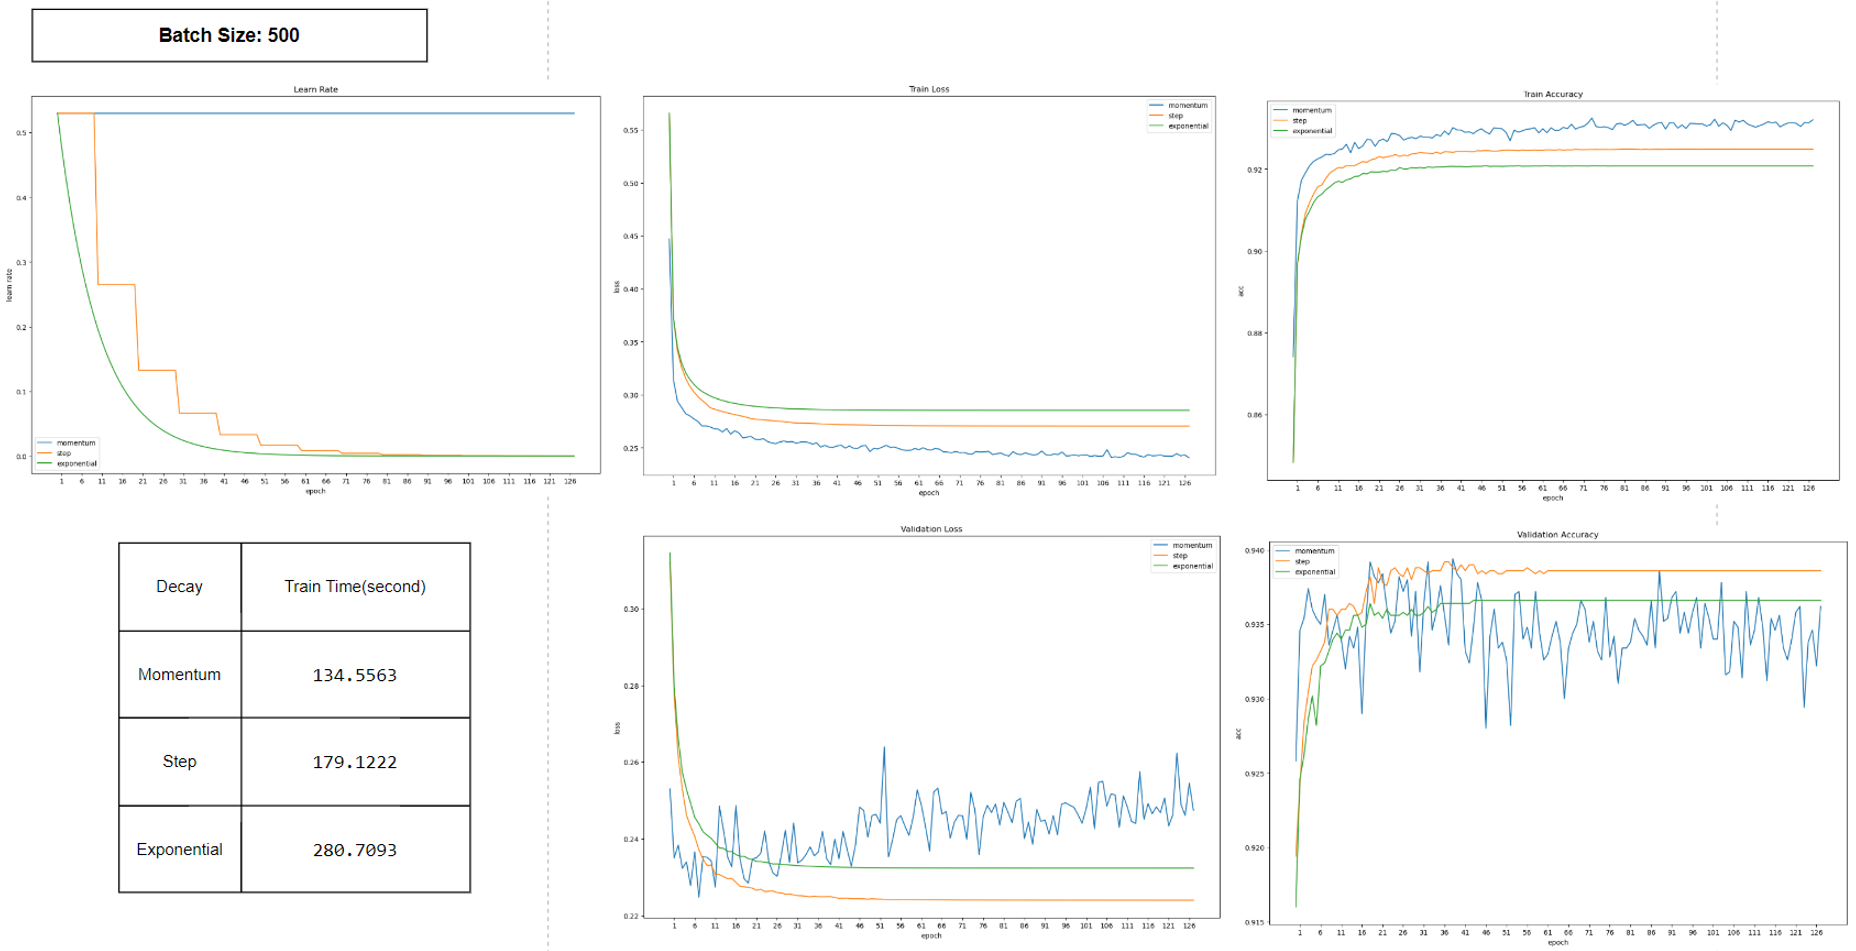
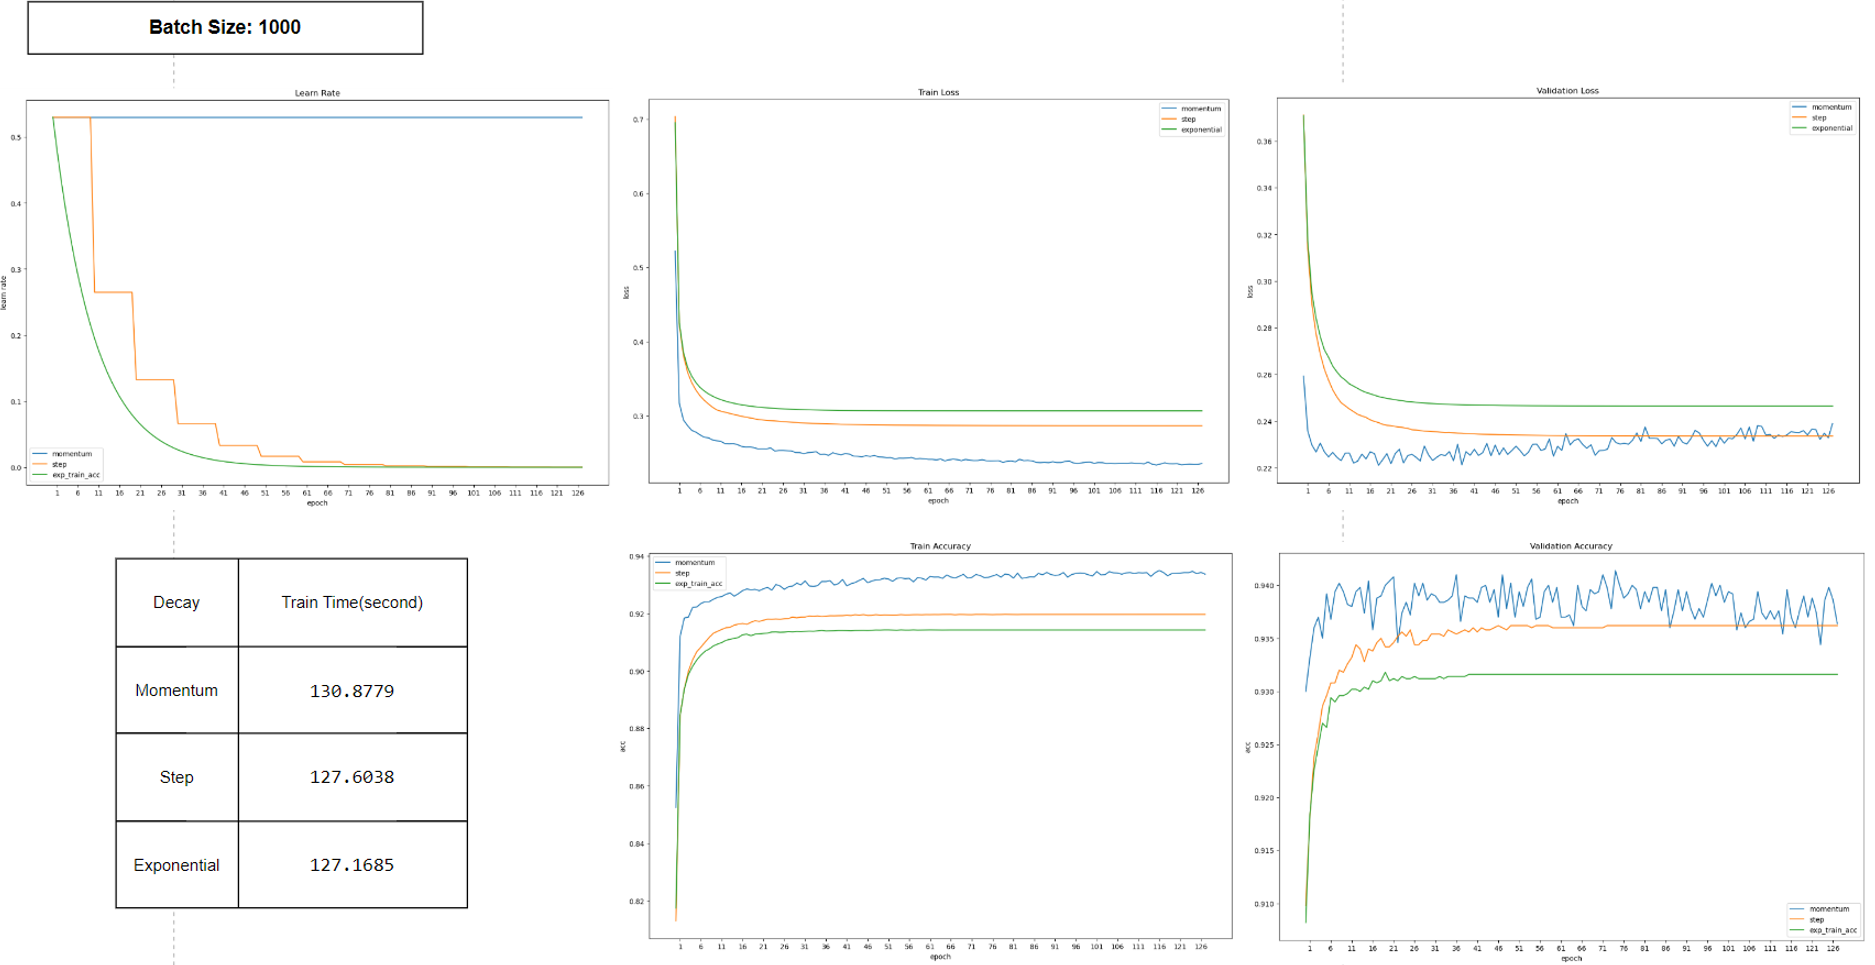
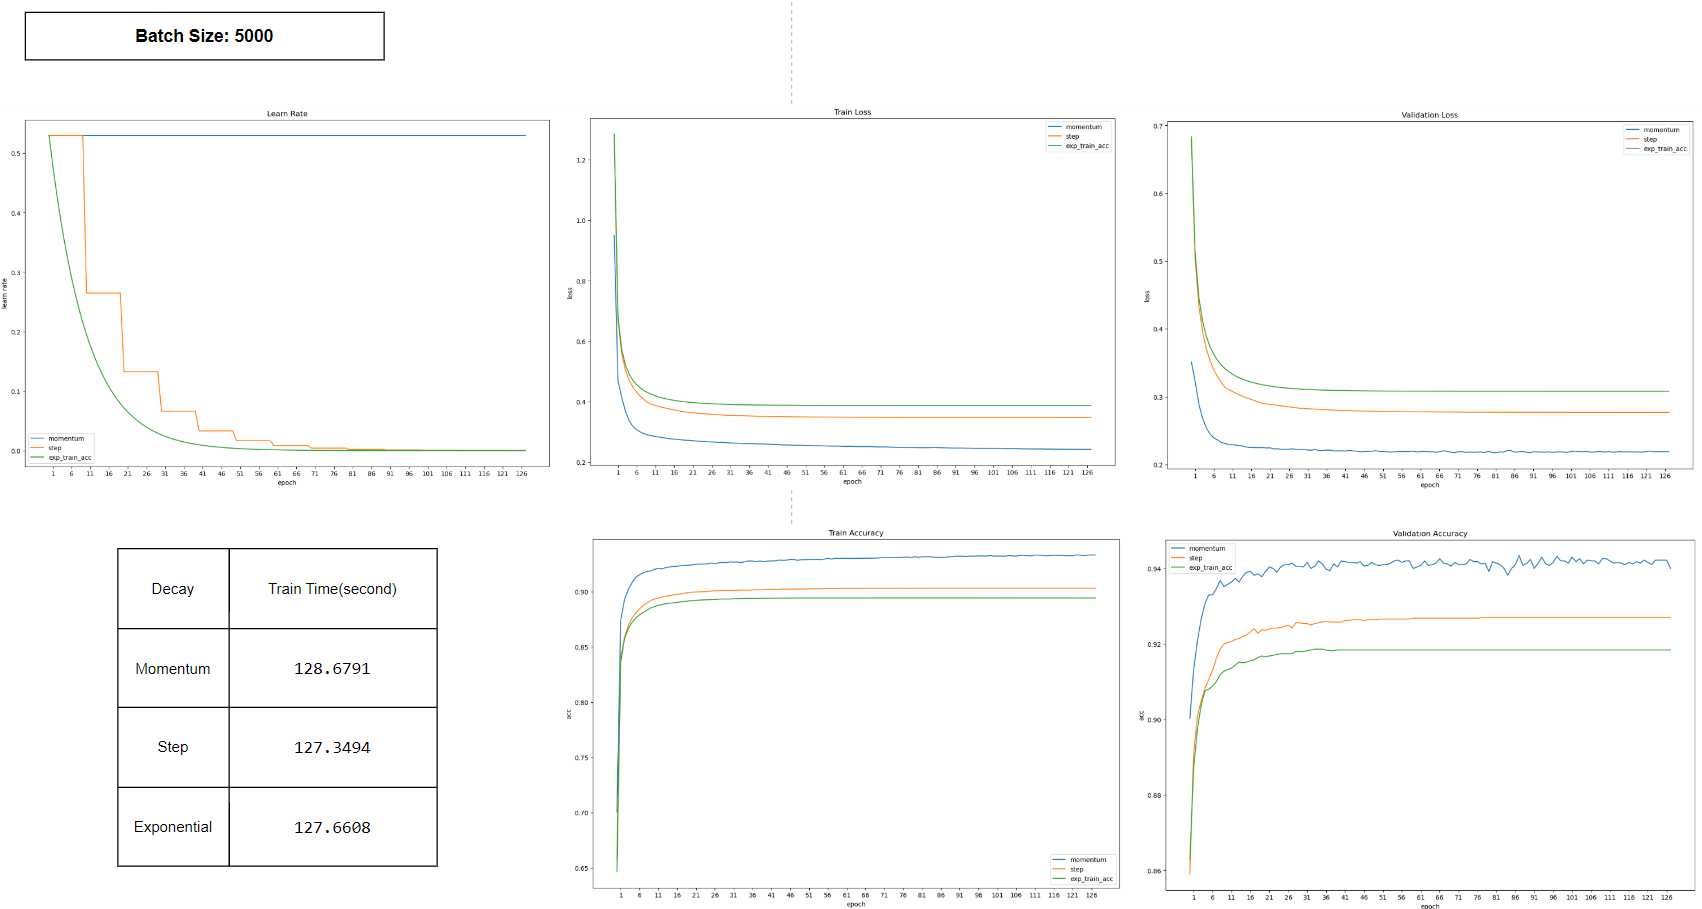

1. Decay for the learn rate is always the same. This is because we are decaying by epochs(schedules), rather than by training results per iteration. Exponential decay offers a smooth curve on learning rate update, which is associated to smooth curves(less fluctuation) on loss and accuracy. The learning rate stops updating(model stops learning) at around 65 epochs for exponential decay and 90 for step decay, and neither of them shows a trend of overfitting in the first 90 epochs.   

2. When batch size is set to 500, both loss and accuracy on the train set fluctuate greatly with SGD(momentum). As analyzed in Section 1, the smaller the batch size is, the more random the gradient can be. Under this occasion, step decay and exponential decay show much smoother convergence and better accuracy. Step decay is better than exponential decay, and converges faster.  

3. When batch size grows to 1000, fluctuations with SGD becomes smaller. However, the loss on the train set keeps decreasing whilst following an upward trend on the validation set. Thos suggests that small batches does not work with a constant learn rate at 0.53 and a momentum at 0.9. Same as when batch size is 500, step decay is better than exponential decay. An interesting observation is that SGD convreges fastest and has the lowest loss on train set. However, although being unstable, it has the largest loss and highest accuracy on the validation set. A potential reason could be that small batches usuallt means the model can be over-sensitive to noises, that could lead to worse predictions. And with the epoch increasing, the model get too 'confident' and bad predictions are penalized much more strongly than good predictions are rewarded. Basically, when both accuracy and loss are increasing, the network is starting to overfit, and both phenomena are happening at the same time.  

4. The largest batch we test is of size 5000. SGD's loss and accuracy get stable and has the best performances. Step decay is the second best. We could still see small fluctuations on SGD accuracy scores on validation. One could say that the network is starting to learn patterns only relevant for the training set and not great for generalization. The size of the batch has huge impact for this significance improvement.  

5. SGD usually requires more time for traing, and step decay requires the least in out experiment. However, with comparatively large batch sizes, train time for step and exponential is close.   

6. Based on the analysis above, we could at most stop training when the epoch gets to 90 before the model gets too 'confident' on the traing patterns that are not relevant or harmful to generalization. Decay methods have more reliable results, smoother convergence and lesser learning cost.

In [ ]:
# step decay (other tests have similar code)
cfg = {
    'data_root': 'data',
    'max_epoch': 90,
    'batch_size': 5000,
    'learning_rate': 0.53,
    'momentum': 0.9,
    'display_freq': 10,
    'decay_type': 'step',
    'drop_rate': 0.5,
    'drop_frequence': 10,
    'k': 0.1,
    }

runner = Solver(cfg)
step_train_loss, step_train_acc, step_val_loss, step_val_acc, step_train_time, steplearn_rates = runner.train()
step_test_loss, step_test_acc = runner.test()

In [ ]:
cfg = {
    'data_root': 'data',
    'max_epoch': 90,
    'batch_size': 5000,
    'learning_rate': 0.53,
    'momentum': 0.9,
    'display_freq': 10,
    'decay_type': 'exponential',
    'drop_rate': 0.5,
    'drop_frequence': 10,
    'k': 0.1,
    }

runner = Solver(cfg)
exp_train_loss, exp_train_acc, exp_val_loss, exp_val_acc, exp_train_time, exp_learn_rates = runner.train()
exp_test_loss, exp_test_acc = runner.test()

## 3. Adaptive Learn Rate -- Adam

ref：https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc

The Adaptive Movement Estimation algorithm, or Adam for short, is an extension to gradient descent and a natural successor to techniques like AdaGrad and RMSProp that automatically adapts a learning rate for each input variable for the objective function and further smooths the search process by using an exponentially decreasing moving average of the gradient to make updates to variables.
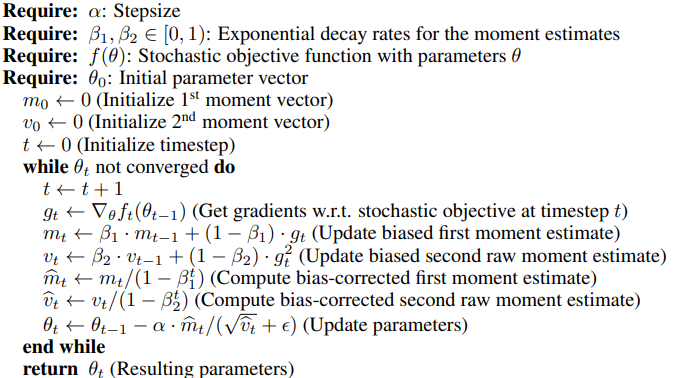

The realization for the Adam algorithm is in `adam.py` under the same path.

We do not have enough time for parameter tuning. Therefore, we will fix beta1 at 0.9 and beta2 at 0.99. Since they are normally good for most of the data.  

The way we define convergence is that, we measure the distances between 1. new weight and weight from last step; 2. new bias and bias from last step. If both distances are lower than a certain threshold for a certai amount of continous steps, we say the model has converged and the training should end.

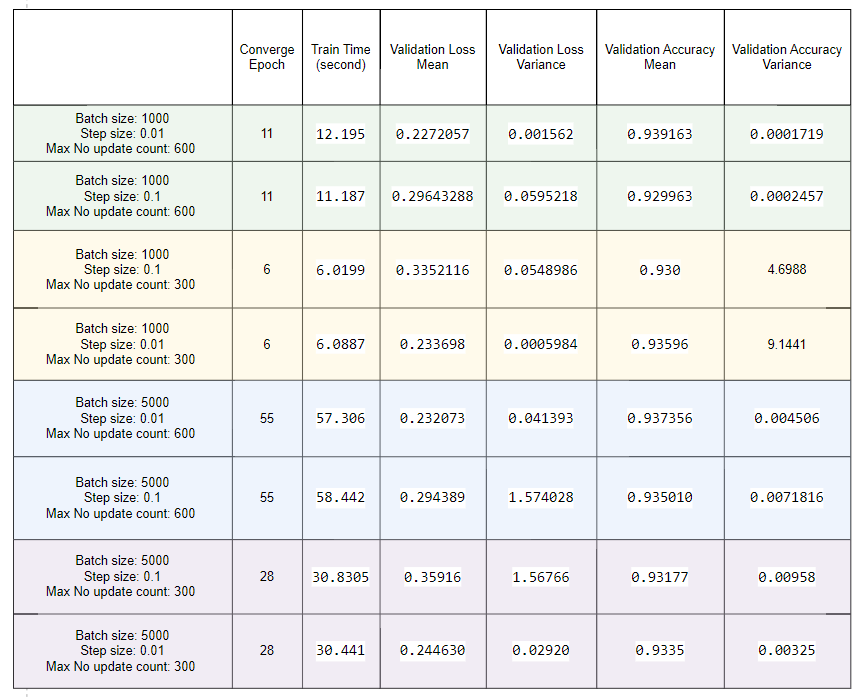
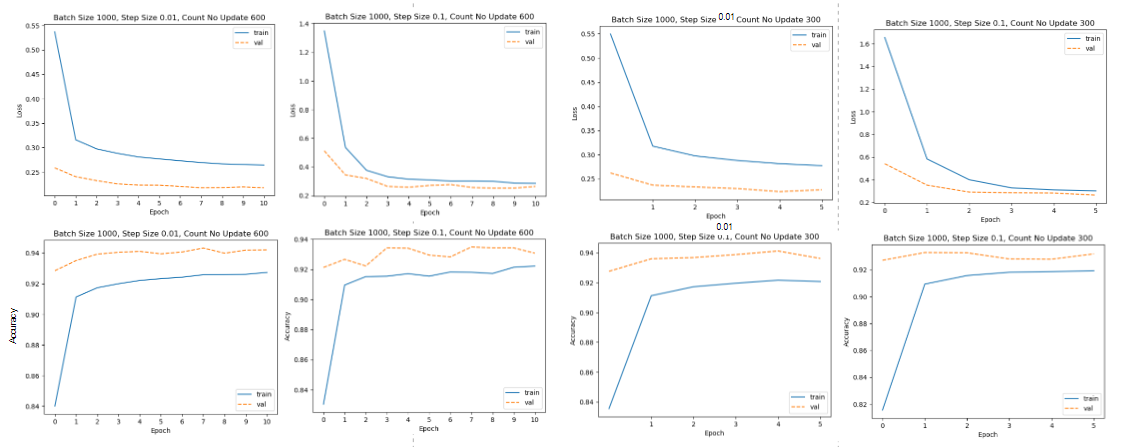
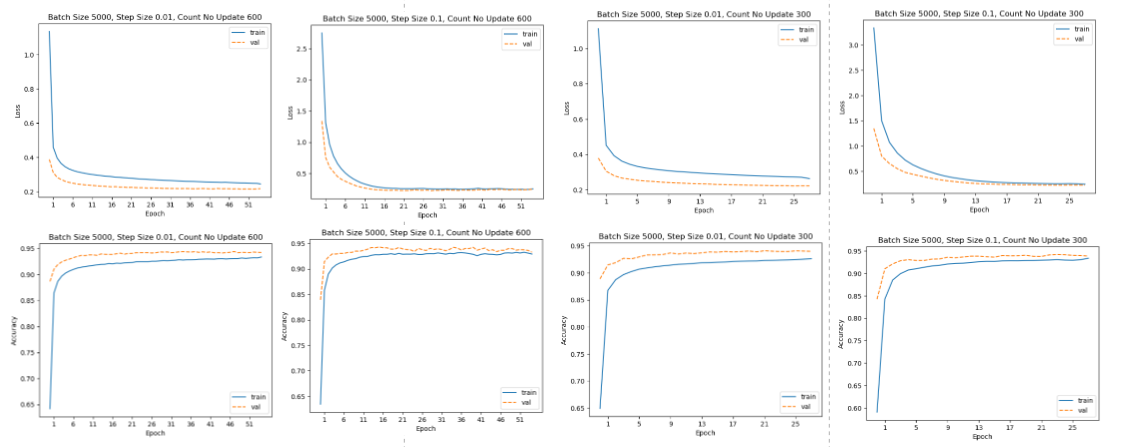

1. When the batch size is set to 1000, all four models we test have fluctuations on validation loss and accuracy, especially when the decay step size is set to 0.1 and max step count for no update is 600. With this model, we could see the validation loss bumps at epoch 2, 3, 6, 8. Small batch sizes could easily lead to high noise sensitivity. And large step size makes the weight and bias jump around the optimal but never get to the best solution(local oscilliations). Also, at least 600 steps with no update to stop traing is a strict rule. We basically keeps emphasizing the noises and rules that can hurt generalization just to reach this 600 limit. This is the reason why reducing the step size or the count limit can both produce much smoother curves(loss and accuracy) and smaller fluctuations.  

2. By comparing the variance and mean for loss and accuracy on epochs, step size 0.01 and count limit 600 works the best on batch size 1000. Both the loss and accuracy variances are the smallest, and the mean being the highest.   

3. For batch size 5000, all curves are smoother than with batch size 1000. Step size 0.01 works better than 0.1, with less fluatuaction, smaller mean and variance on loss, and higher mean and lower variance on accuracy. This phenomenon is analyzed in 1. With this batch size, step size at 0.01 and count limit at 600 produce the best result.

4. In our experiment, the amount of epochs to take for converge is the same if the batch size and count limit are the same. We could also see from the curves that for a comparatively good performance, the loss on the train set starts to get stable at about the first 30% epochs. Our computing gives small updates on weights and biases. And if we set a high count limit, there could be 2 situations: (1) with a small step size, the regression gets closer and closer to the optimal solution with minor changes; (2) with a large step size, the regression skips the optimal solution and bouncing around this point, due to the decay is too significan to lower the changes on weights and biases.

5. Overall, Adam can give a reliable and statistical significance good learning results, with smooth loss and fast converge, stable accuracy and less learning cost.

## 4. Conclusion

The optimal model we choose has the parameters as following: learning rate 0.53, momentum 0.9, batch size 5000 and max epochs 128. The accuracy on the test set reaches to 0.9253 and has average loss at 0.2663.  

The balance between batch size, max epoch, learning rate and momentum, has decisive influences over the learning results. Small batch sizes could lead to underfitting or over-sensitivity on the data noise, large batch sizes with large ephocs commit to more stable commitm they can also decrese the generalization ability of the model. They also affect the train cost and convergence.
Learning rate and momentum also have great impact on how a model converges. Large values for learning rates can help the model converge faster. However, it is also possible to result in minima optimal or local oscillations around the optimal solutions.  

In our experiment, we test step decay and exponential decay. Due to the limitation of time, the compare and contrast stage does not involke ant parameter tuning stage. Therefore, it would be too reckless to conclude which one is better for our data and tasks. But we could say that decaying can lead to faster convergence and smoother loss and accuracy, especially for exponential decay. SGD only becomes the best until the batch size becomes huge. Small fluctutions still happen on this 'SGD' best performace. It could be that the model starts to only learn and use patterns that are good for generalization.  

As another extended interest, Adam(Adaptive Movement Estimation algorithm) is implemented. The best model among the ones we test is: batch size 5000, decay for mean 0.9, decay for variance 0.99, step size 0.01, and the model will stop learning if update on biases and weights are lower than a small threshold for 600 continuous steps. The mean accuracy and mean loss for this model on the test set prediction are 0.9264 and 0.2643. Overall, Adam can give a reliable and statistical significance good learning results, with smooth loss and fast converge, stable accuracy and less learning cost.
